![](https://github.com/l3LlFF/kaggle/blob/main/datasets/banana_quality/banana_ripens.jpg?raw=true)


<center><h1>🍌 Banana quality EDA 🍌</h1></center>

# Introduction

Quality of banana is defined by several quality attributes. The most important are appearance, colour, texture and flavour. Appearance and colour are examples of quality attributes judged on the outside, whereas texture and flavour are internal quality parameters. The quality attributes are influenced by variety, preharvest factors, harvest practices and postharvest handling. Determination of fruit quality provides an important indication of the remaining storage potential and shelf-life.

Important quality characteristics of bananas are shape, colour, brightness of the skin, and texture and flavour of the pulp. During the ripening process of the banana several changes occur. Tissue starts to soften, starch is degraded into sugars in pulp and skin, the skin becomes light green and then yellow, and the characteristic banana aroma is produced. Diseases and disorders should be prevented as much as possible. The minimum requirements for good quality are: intact, healthy, clean, fresh in appearance, firm, (practically) free of damages, free of malformation, with the stalk intact and free from foreign smell and / or taste.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')


# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')

In [2]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [5]:
df['Quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: object>

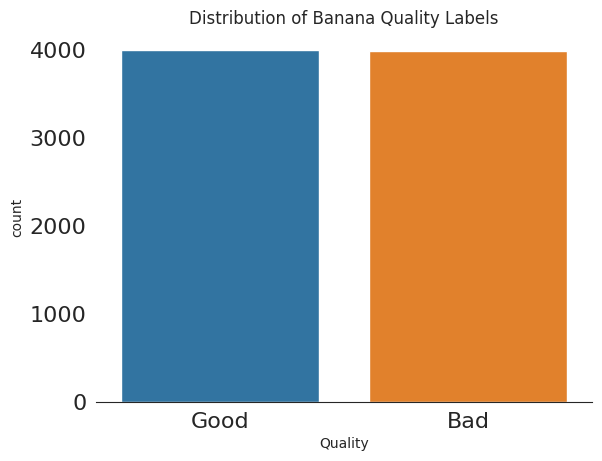

In [6]:
sns.countplot(x='Quality', data=df)
plt.title('Distribution of Banana Quality Labels')
plt.show()

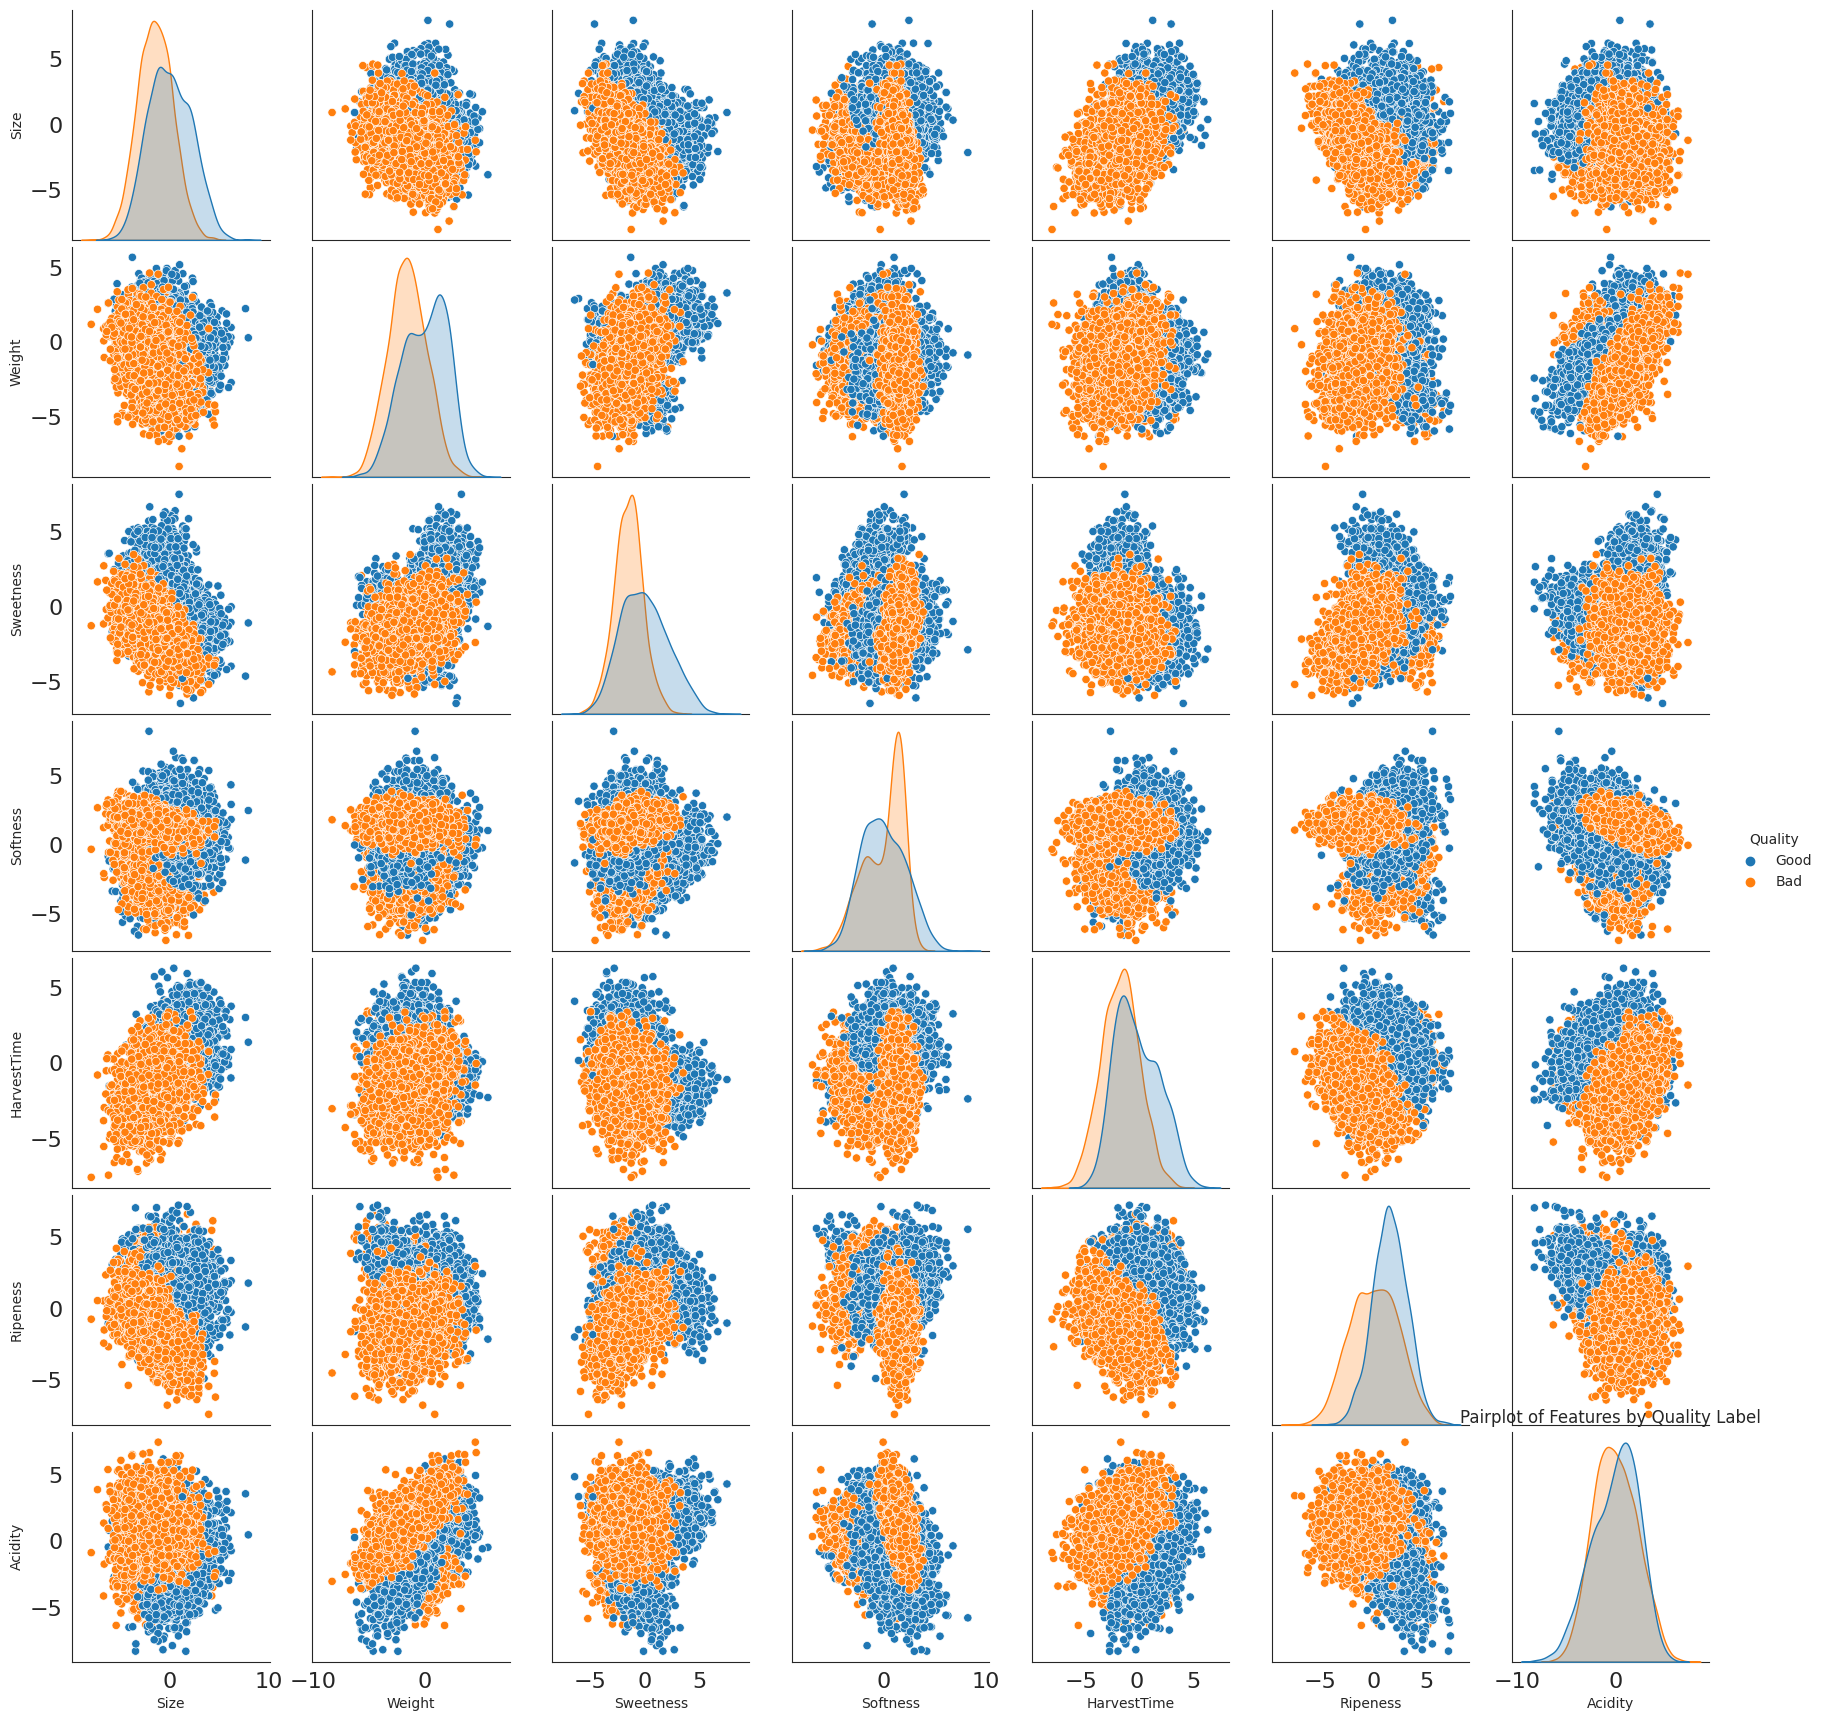

In [7]:
sns.pairplot(df, hue='Quality')
plt.title('Pairplot of Features by Quality Label')
plt.show()


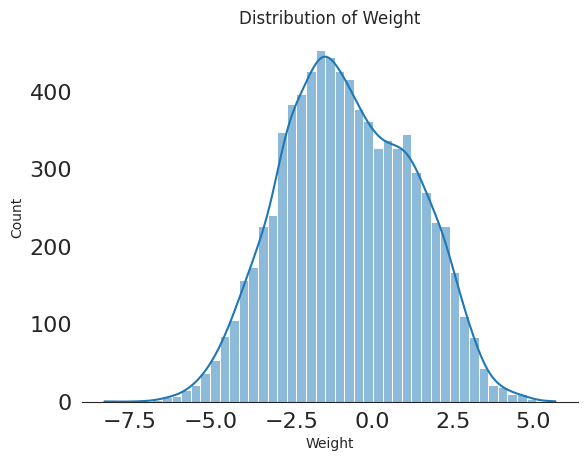

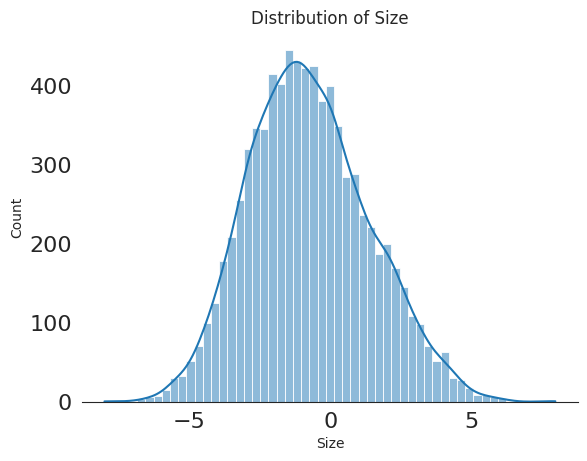

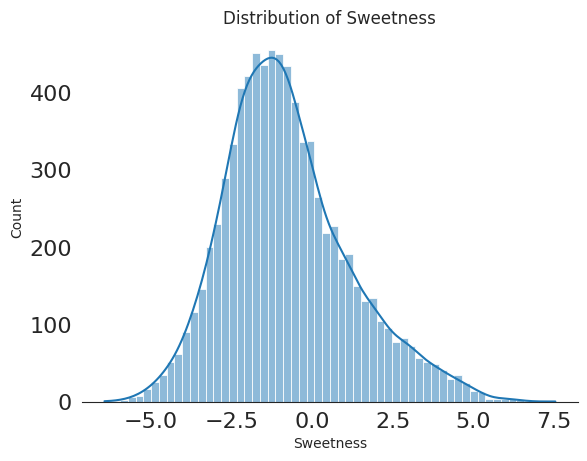

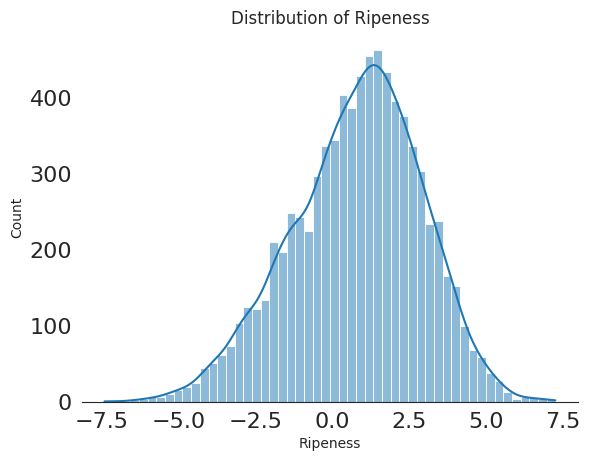

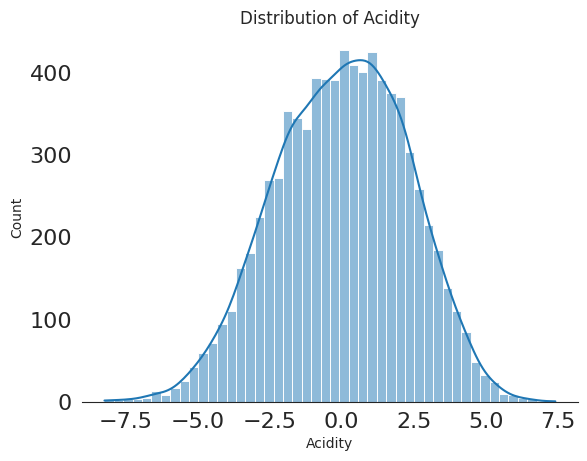

In [8]:
for feature in ['Weight', 'Size', 'Sweetness','Ripeness','Acidity']:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Classification of data

Classification Report:
              precision    recall  f1-score   support

         Bad       0.98      0.97      0.97       781
        Good       0.97      0.98      0.98       819

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.97      1600
weighted avg       0.98      0.97      0.97      1600



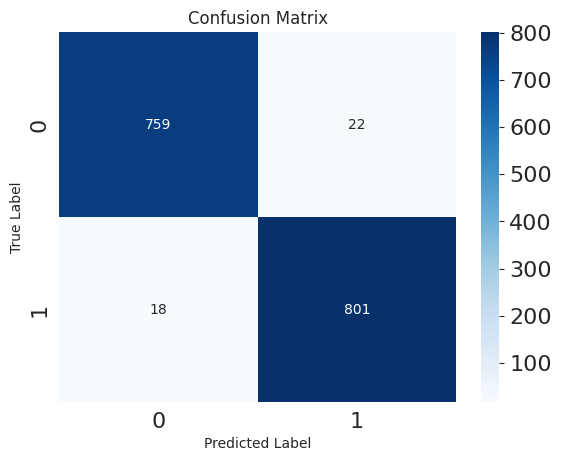

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and labels
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Thank you
# Meet you on another notebook

### Notebook in progress...